In [22]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1012. NC Well Arsenic/P1012.2. Analyses/P1012.2.3. ML Visualizations/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1012. NC Well Arsenic/P1012.2. Analyses/P1012.2.3. ML Visualizations/Output')
cur_date = "052323"

library(readxl)
library(tidyverse)
library(ggrepel)
library(tidytext)

# reading in file
var_imp_df = data.frame(read_excel("Variable_Importance_052323.xlsx")) 

In [23]:
head(var_imp_df)

,Predictor,Outcome,Importance,Model
,<chr>,<chr>,<dbl>,<chr>
1,Casing_Depth,Detect_Concentration,0.007375083,SVM
2,Flow_Rate,Detect_Concentration,0.017930298,SVM
3,Static_Water_Depth,Detect_Concentration,0.012070605,SVM
4,Water_Sample_Date,Detect_Concentration,-0.007841285,SVM
5,Well_Depth,Detect_Concentration,-0.017484962,SVM
6,pH,Detect_Concentration,0.056215000,SVM


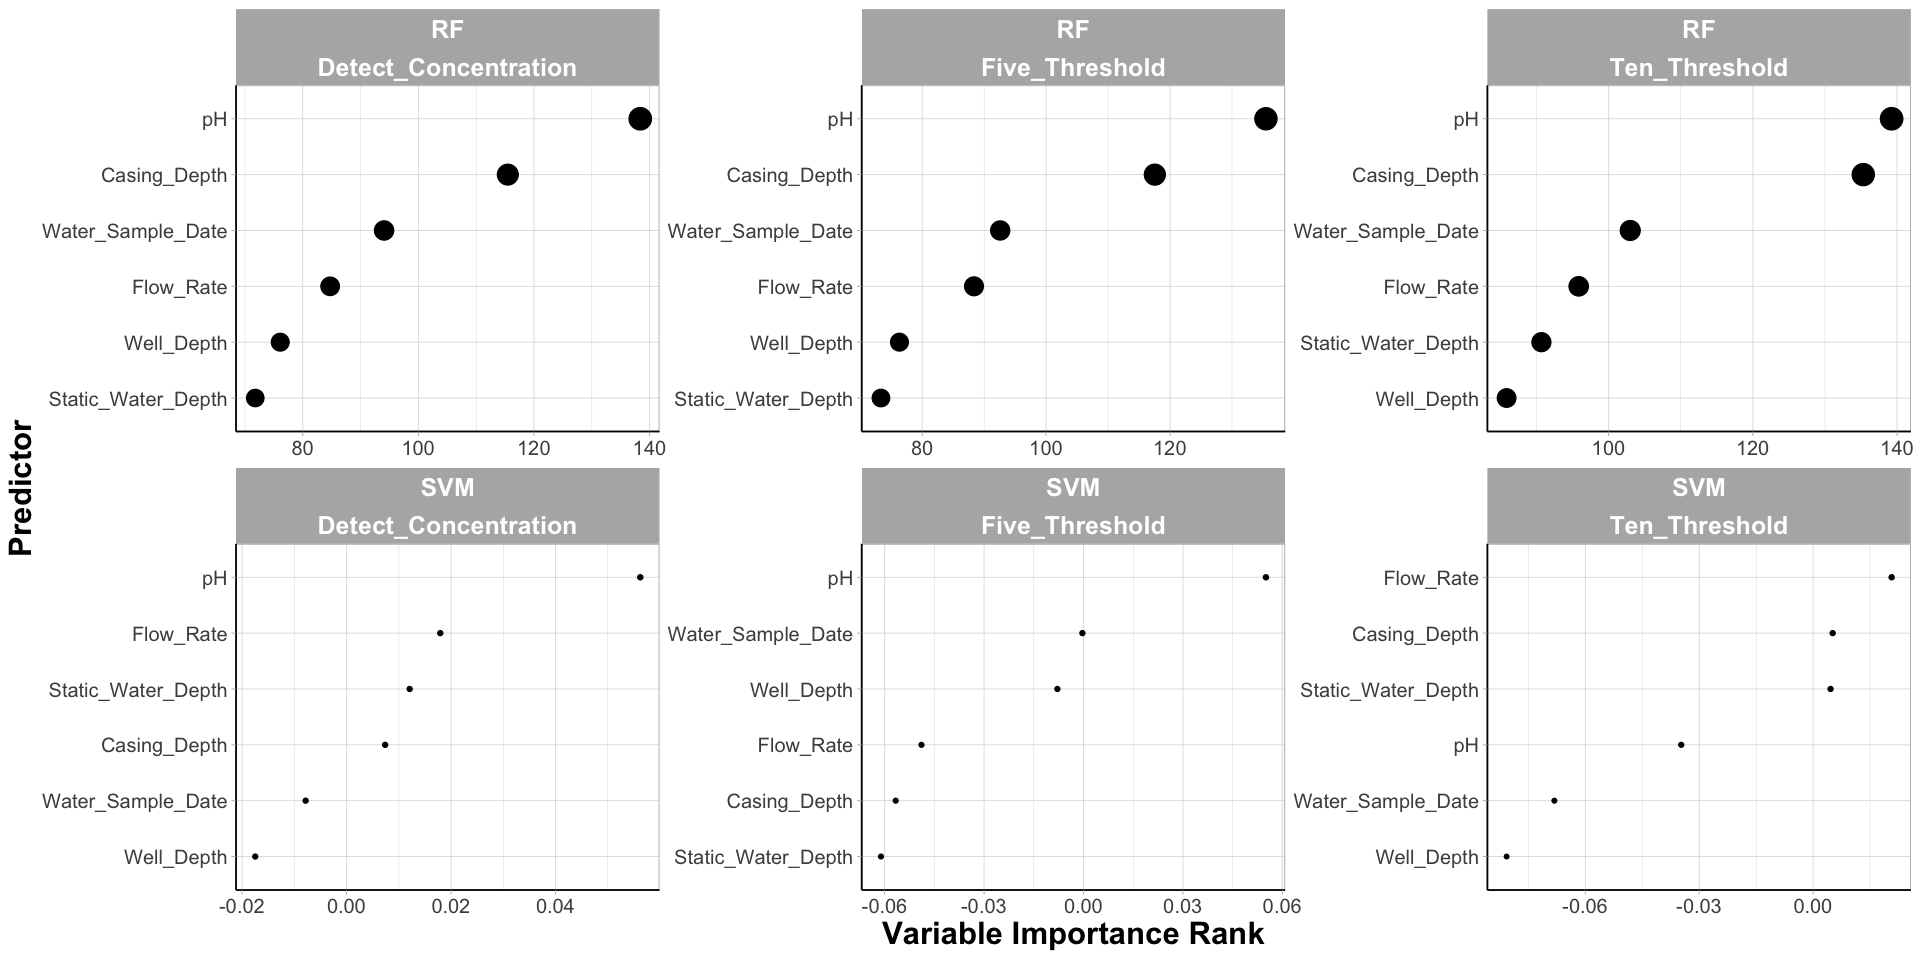

In [24]:
options(repr.plot.width=16, repr.plot.height=8) #changing size

ggplot() + 
  geom_point(data = var_imp_df, 
             aes(x = Importance, y = reorder_within(Predictor, Importance, list(Model, Outcome)), 
                 size = Importance)) + 

#  geom_vline(xintercept = 0, color = "blue", linetype = "dotdash") +

  scale_y_reordered() + # for some reason this cleans up the variables names

  facet_wrap(Model~Outcome, scales = "free") + 

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Variable Importance Rank', y = 'Predictor') + #changing axis labels 
  
  #removing size legend
  guides(size = "none")